C:\Users\Juan Blanco\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


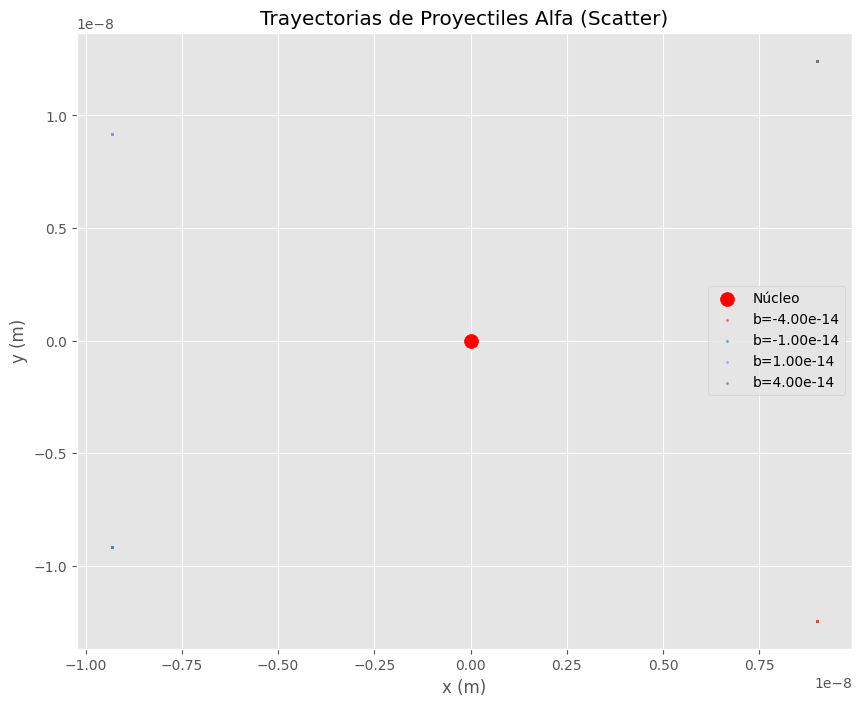

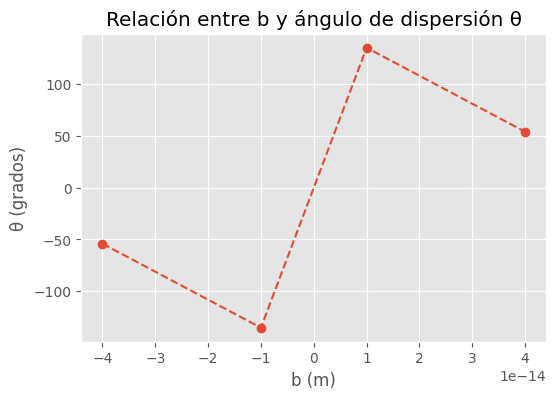

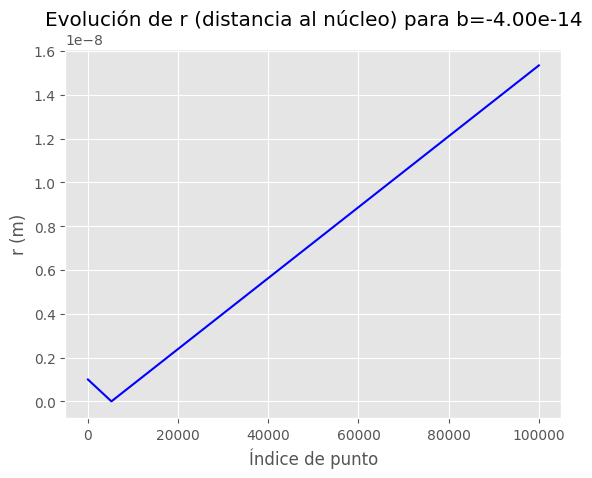

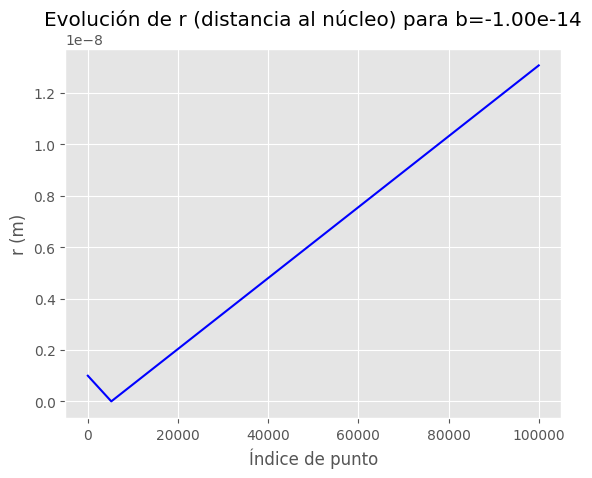

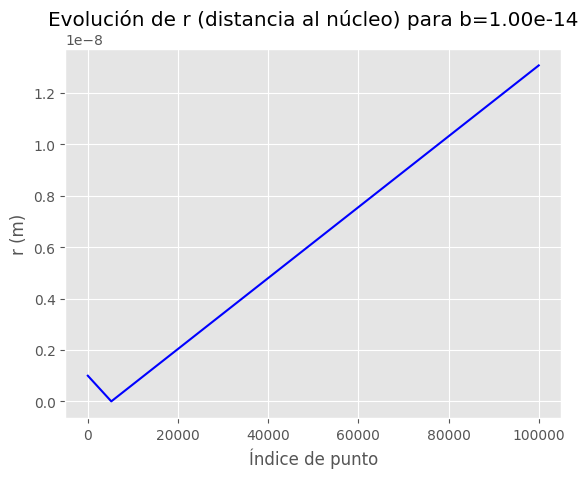

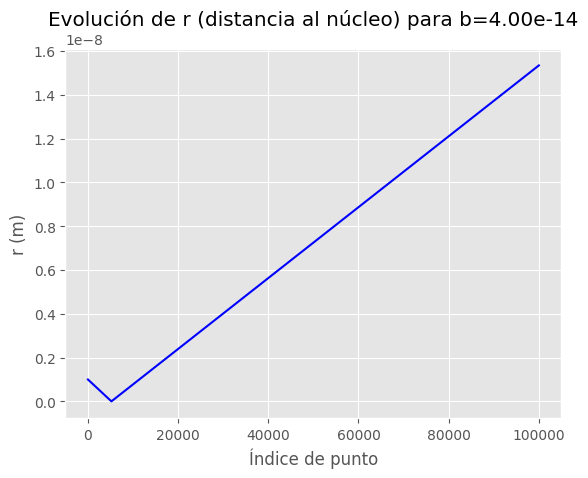

b=-4e-14m -> θ=-54.11588209101448°, r_min=6.61271806996852e-14m
b=-1e-14m -> θ=-135.4390340147315°, r_min=5.1404749637314576e-14m
b=1e-14m -> θ=135.4390340147315°, r_min=5.1404749637314576e-14m
b=4e-14m -> θ=54.11588209101448°, r_min=6.61271806996852e-14m


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import pi

tiempo = np.linspace(0,1000,10000)
dt = 1e-20

def radial_distance(location):
    return np.linalg.norm(location)

def velocity(k, alpha_mass):
    k *= 1.6022E-13
    return np.sqrt(2.0 * k / alpha_mass)

def coulomb_force(alpha_charge,target_charge,location,r):
    k = 1 / (4 *np.pi * 8.854e-12)
    x, y = location
    F_mag = k * alpha_charge * target_charge /r**2
    F_y = F_mag * y /r
    F_x = F_mag * x /r
    return np.array([F_x, F_y])


def simulation(particle):
    history = []
    r_values = []

    for i in range(0,100000):
        location = particle["location"]
        alpha_mass = particle["alpha_mass"]
        alpha_charge = particle["alpha_charge"]
        target_charge = particle["target_charge"] 
        velocity = particle["velocity"]
    
        history.append(location)
        r = radial_distance(location)
        r_min = particle["r_min"]
        r_values.append(r)

        if r_min is None or r < r_min:
            particle["r_min"] = r

        force = coulomb_force(alpha_charge, target_charge, location, r)
        acceleration_x = force[0]/alpha_mass
        acceleration_y = force[1]/alpha_mass

        velocity[0] += acceleration_x * dt 
        velocity[1] += acceleration_y * dt 

        location[0] += velocity[0] *dt
        location[1] += velocity[1] * dt

        particle["location"] = location
        particle["velocity"] = velocity

    particle["history"] = history
    particle["r_values"] = r_values
    velocity_x, velocity_y = particle["velocity"]
    particle["theta_dispersion"] = np.degrees(np.arctan2(velocity_y, velocity_x))

    return particle

def graphs(alpha_mass, alpha_charge, target_proton_num, k, bs):

    particles = []

    plt.figure(figsize=(10, 8))
    plt.title("Trayectorias de Proyectiles Alfa (Scatter)")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")

    plt.scatter([0], [0], color="red", s=100, label="Núcleo")
        
    angles = []
    minimum_dist = []
    target_charge = target_proton_num * 1.6e-19

    for b in bs:
        l0 = [-1e-9, b]
        v0 = [velocity(k, alpha_mass), 0.0]
        r0 = radial_distance(l0)

        particle = {"alpha_mass": alpha_mass,
                    "alpha_charge": alpha_charge,
                    "location" : l0,
                    "velocity" : v0,
                    "target_charge": target_charge,
                    "r_min": None}
        
        particle= simulation(particle)
        particles.append(particle)

        history = particle["history"]

        for p in history:
            xs = p[0]
            ys = p[1]
            plt.scatter(xs, ys, s=2, alpha=0.7, label=f"b={b:.2e}")

        angles.append(particle["theta_dispersion"])
        minimum_dist.append(particle["r_min"])

    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(6,4))
    plt.title("Relación entre b y ángulo de dispersión θ")
    plt.xlabel("b (m)")
    plt.ylabel("θ (grados)")
    plt.plot(bs, angles, 'o--')
    plt.grid(True)
    plt.show()

    for i, particle in enumerate(particles):
            plt.figure()
            plt.title(f"Evolución de r (distancia al núcleo) para b={bs[i]:.2e}")
            plt.xlabel("Índice de punto")
            plt.ylabel("r (m)")
            plt.plot(particle["r_values"], '-b')
            plt.grid(True)
            plt.show()

    for i, b in enumerate(bs):
            print(f"b={b}m -> θ={angles[i]}°, r_min={minimum_dist[i]}m")

bs = [-4e-14, -1e-14, 1e-14, 4e-14]
alpha_mass = 6.64e-27
alpha_charge = 2.0 * 1.60217662e-19
target_proton_num = 79
k = 7.7
graphs(alpha_mass, alpha_charge, target_proton_num, k, bs)